# Assignment 8

Problem Statement:

Implement DBSCAN algorithm from scratch using the same data set that was given for Kmeans.

Calculate the accuracy of the method and compared it with Accuracy of the K-means. Find a suitable value of epsilon for DBSCAN algorithm. 

In [45]:
%matplotlib inline

In [3]:
! pip install -Uqq pandas-profiling

     |████████████████████████████████| 261 kB 5.3 MB/s 
     |████████████████████████████████| 102 kB 9.8 MB/s 
     |████████████████████████████████| 3.1 MB 16.3 MB/s 
     |████████████████████████████████| 303 kB 47.3 MB/s 
     |████████████████████████████████| 675 kB 40.4 MB/s 
     |████████████████████████████████| 596 kB 35.3 MB/s 
     |████████████████████████████████| 10.9 MB 33.4 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 41.0 MB/s 
     |████████████████████████████████| 38.1 MB 58.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Exploratory Data Analysis

In [5]:
df = pd.read_csv("https://gist.githubusercontent.com/kurianbenoy/a4c1f02a3538956554c711969f74a252/raw/290a486690f740431482acb977e280560727c7b4/mall_customer.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,1,Male,19,15,39,B
1,2,Male,21,15,81,E
2,3,Female,20,16,6,A
3,4,Female,23,16,77,D
4,5,Female,31,17,40,B


In [7]:
no_customers = df.shape[0]
no_customers

200

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Class'],
      dtype='object')

In [10]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

In [11]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [12]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

In [13]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## KNN from scratch

In [15]:
df_X = df.iloc[:, [3,4]].values
df_X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [16]:
m = df_X.shape[0] #number of training examples
n = df_X.shape[1] #number of features. Here n=2n_iter=100

In [17]:
m, n

(200, 2)

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df_X[:,0],df_X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions - Spending Score')
plt.legend()
plt.title('Plot of data points')
plt.show()

In [19]:
centroids=np.array([]).reshape(n,0) 
centroids

array([], shape=(2, 0), dtype=float64)

In [20]:
K=5

In [21]:
import random as rd
for i in range(K):
    rand=rd.randint(0,m-1)
    centroids=np.c_[centroids,df_X[rand]]

In [22]:
centroids

array([[72., 78., 77., 65., 87.],
       [71., 90., 74., 43., 10.]])

In [23]:
outputs = {}

In [24]:
euclidean_distance = np.array([]).reshape(m, 0)

for k in range(K):
  temp_dist = np.sum((df_X - centroids[:, k])**2, axis=1)
  euclidean_distance = np.c_[euclidean_distance, temp_dist]
  

In [25]:
some_value_c = np.argmin(euclidean_distance, axis=1) + 1
some_value_c

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 4, 4, 2, 4, 1,
       4, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 2, 4, 1, 4, 2, 5, 1, 5, 1,
       4, 1, 5, 2, 5, 1, 5, 1, 5, 2, 4, 2, 5, 2, 4, 3, 5, 2, 5, 2, 5, 3,
       5, 2, 5, 3, 5, 3, 4, 2, 5, 2, 5, 3, 5, 2, 5, 3, 5, 3, 5, 2, 5, 2,
       5, 3, 5, 2, 5, 2, 5, 2, 5, 2, 5, 3, 5, 2, 5, 3, 5, 2, 5, 3, 5, 3,
       5, 2])

In [26]:
len(some_value_c)

200

In [27]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[some_value_c[i]]=np.c_[Y[some_value_c[i]],df_X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     centroids[:,k]=np.mean(Y[k+1],axis=0)
output = Y

In [28]:
n_iter=100

In [29]:
for iter in range(n_iter):
  euclidean_distance = np.array([]).reshape(m, 0)

  for k in range(K):
    temp_dist = np.sum((df_X - centroids[:, k])**2, axis=1)
    euclidean_distance = np.c_[euclidean_distance, temp_dist]

    # It contains euclidean_distance of all values
    some_value_c = np.argmin(euclidean_distance, axis=1) + 1

  Y={}
  for k in range(K):
      Y[k+1]=np.array([]).reshape(n,0)
  for i in range(m):
      Y[some_value_c[i]]=np.c_[Y[some_value_c[i]],df_X[i]]
  
  for k in range(K):
      Y[k+1]=Y[k+1].T

  for k in range(K):
     centroids[:,k]=np.mean(Y[k+1],axis=0)

  output = Y

In [30]:
centroids

array([[ 25.72727273,  78.03571429, 108.18181818,  48.16831683,
         87.        ],
       [ 79.36363636,  81.89285714,  82.72727273,  43.3960396 ,
         18.63157895]])

In [31]:
df_X[:, 0]

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

In [32]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(output[k+1][:,0],output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()

## KMeans Approach (Finding optimal value of K)

#### Reference - ML models being shared at class

In [33]:
from dataclasses import dataclass, field

import pandas as pd
import random as rd

@dataclass
class kmeans:
    df_X: pd.DataFrame
    K: int
    m: int
    output: dict = field(default_factory=dict)
    centroids: np.array = np.array([]).reshape(m, 0)

    def kmeanspp(self, df_X, K):
        """Responsible for creating initial k centroids
        Else we can randomly choose k points
        """
        i = rd.randint(0, df_X.shape[0])
        Centroid_temp = np.array([df_X[i]])
        for k in range(1, K):
            D = np.array([])
            for x in df_X:
                D = np.append(D, np.min(np.sum((x - Centroid_temp) ** 2)))
            prob = D / np.sum(D)
            cummulative_prob = np.cumsum(prob)
            r = rd.random()
            i = 0
            for j, p in enumerate(cummulative_prob):
                if r < p:
                    i = j
                    break
            Centroid_temp = np.append(Centroid_temp, [df_X[i]], axis=0)
        return Centroid_temp.T

    def fit(self, n_iterations):
        self.centroids = self.kmeanspp(self.df_X, self.K)

        for iter in range(n_iterations):
            euclidean_distance = np.array([]).reshape(self.m, 0)

            for k in range(self.K):
                temp_dist = np.sum((df_X - centroids[:, k])**2, axis=1)
                euclidean_distance = np.c_[euclidean_distance, temp_dist]

            # It contains euclidean_distance of all values
            some_value_c = np.argmin(euclidean_distance, axis=1) + 1

            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(n,0)
            for i in range(self.m):
                Y[some_value_c[i]]=np.c_[Y[some_value_c[i]],self.df_X[i]]
              
            for k in range(self.K):
                Y[k+1]=Y[k+1].T

            for k in range(self.K):
                centroids[:,k]=np.mean(Y[k+1],axis=0)

            self.output = Y


    def predict(self):
        return self.output, self.centroids.T

# Unfortunately the implementation with DataClasses had a bug in python implementation(which is causing errors)

In [34]:
class Kmeans:
    def __init__(self, X, K):
        self.X = X
        self.Output = {}
        self.Centroids = np.array([]).reshape(self.X.shape[1], 0)
        self.K = K
        self.m = self.X.shape[0]

    def kmeanspp(self, X, K):
        """Responsible for creating initial k centroids
        Else we can randomly choose k points
        """
        i = rd.randint(0, X.shape[0])
        Centroid_temp = np.array([X[i]])
        for k in range(1, K):
            D = np.array([])
            for x in X:
                D = np.append(D, np.min(np.sum((x - Centroid_temp) ** 2)))
            prob = D / np.sum(D)
            cummulative_prob = np.cumsum(prob)
            r = rd.random()
            i = 0
            for j, p in enumerate(cummulative_prob):
                if r < p:
                    i = j
                    break
            Centroid_temp = np.append(Centroid_temp, [X[i]], axis=0)
        return Centroid_temp.T

    def fit(self, n_iter):
        # randomly Initialize the centroids
        self.Centroids = self.kmeanspp(self.X, self.K)

        """for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.X[rand]]"""
        # compute euclidian distances and assign clusters
        for n in range(n_iter):
            EuclidianDistance = np.array([]).reshape(self.m, 0)
            for k in range(self.K):
                tempDist = np.sum((self.X - self.Centroids[:, k]) ** 2, axis=1)
                EuclidianDistance = np.c_[EuclidianDistance, tempDist]
            C = np.argmin(EuclidianDistance, axis=1) + 1
            # adjust the centroids
            Y = {}
            for k in range(self.K):
                Y[k + 1] = np.array([]).reshape(2, 0)
            for i in range(self.m):
                Y[C[i]] = np.c_[Y[C[i]], self.X[i]]

            for k in range(self.K):
                Y[k + 1] = Y[k + 1].T
            for k in range(self.K):
                self.Centroids[:, k] = np.mean(Y[k + 1], axis=0)

            self.Output = Y

    def predict(self):
        return self.Output, self.Centroids.T

    def WCSS(self):
        wcss = 0
        for k in range(self.K):
            wcss += np.sum((self.Output[k + 1] - self.Centroids[:, k]) ** 2)
        return wcss

In [35]:
t = Kmeans(df_X, K)
t.fit(100)
output, centroids = t.predict()

In [36]:
df_X.shape

(200, 2)

In [37]:
WCSS_array=np.array([])
for K in range(1,11):
    print(f"Value of k: {K}")
    t=Kmeans(df_X,K)
    t.fit(100)
    Output,Centroids=t.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)

Value of k: 1
Value of k: 2
Value of k: 3
Value of k: 4
Value of k: 5
Value of k: 6
Value of k: 7
Value of k: 8
Value of k: 9
Value of k: 10


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


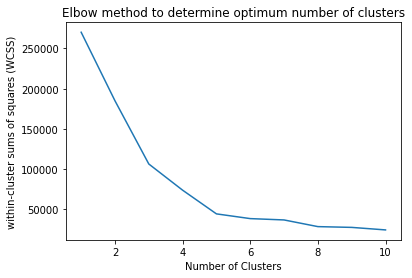

In [60]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

Let's Choose K =5

In [42]:
t = Kmeans(df_X, K=5)
t.fit(100)
output, centroids = t.predict()

In [43]:
centroids

array([[26, 20],
       [86, 82],
       [55, 49],
       [25, 79],
       [88, 17]])

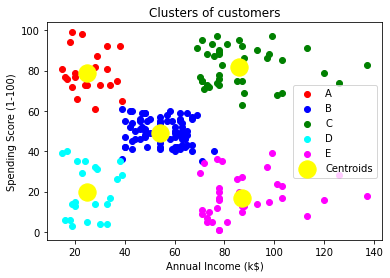

In [50]:
K=5
kmeans=Kmeans(df_X,K)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()
color=['red','blue','green','cyan','magenta']
labels=['A','B','C','D','E']
for k in range(K):
  plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [66]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Class'],
      dtype='object')

### Calculate Accuracy for Kmeans

In [119]:
for k in range(K):
  for n in range(len(Output[k+1])):
    x, y = Output[k+1][n][0],Output[k+1][n][1]
    for row in df.itertuples():
      if((row._4==x )& (row._5 == y)):
        df.at[row.Index, 'predicted'] = labels[k]

In [91]:
df['predicted'].value_counts()

B    81
C    39
E    36
D    22
A    22
Name: predicted, dtype: int64

In [96]:
actual_results = df['Class'].tolist()
predicted_results = df['predicted'].tolist()

<class 'list'>


In [97]:
from sklearn.metrics import accuracy_score

print(f"Accuracy of kmeans classifier is: {accuracy_score(actual_results, predicted_results)}")

Accuracy of kmeans classifier is: 0.025


- The way I have labelled model and models prediction is different

In [98]:
df['Class'].value_counts()

C    75
A    37
D    32
E    30
B    26
Name: Class, dtype: int64

In [99]:
df['predicted'].value_counts()

B    81
C    39
E    36
D    22
A    22
Name: predicted, dtype: int64

Yet our ML had clearly identified the pattern of total counts per classes, and the low accuracy is probably because of incorrect labelling technique used.

## DBSCAN Algorithm

Let's try to implement DBSCAN Algorithm for calculating accuracy.

Reference: https://github.com/scrunts23/CS-Data-Science-Build-Week-1/blob/master/model/test.py



In [108]:
import numpy

def dbscan(D, eps, MinPts):
    '''
    Cluster the dataset `D` using the DBSCAN algorithm.
    
    dbscan takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.
    
    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    '''
 
    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.    
    labels = [0]*len(D)

    # C is the ID of the current cluster.    
    C = 0
    
    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the 
    # cluster growth is all handled by the 'expandCluster' routine.
    
    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, len(D)):
    
        # Only points that have not already been claimed can be picked as new 
        # seed points.    
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
           continue
        
        # Find all of P's neighboring points.
        NeighborPts = region_query(D, P, eps)
        
        # If the number is below MinPts, this point is noise. 
        # This is the only condition under which a point is labeled 
        # NOISE--when it's not a valid seed point. A NOISE point may later 
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to 
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else: 
           C += 1
           grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    # All data has been clustered!
    return labels


def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    '''
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `NeighborPts` - All of the neighbors of `P`
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    '''

    # Assign the cluster label to the seed point.
    labels[P] = C
    
    # Look at each neighbor of P (neighbors are referred to as Pn). 
    # NeighborPts will be used as a FIFO queue of points to search--that is, it
    # will grow as we discover new branch points for the cluster. The FIFO
    # behavior is accomplished by using a while-loop rather than a for-loop.
    # In NeighborPts, the points are represented by their index in the original
    # dataset.
    i = 0
    while i < len(NeighborPts):    
        
        # Get the next point from the queue.        
        Pn = NeighborPts[i]
       
        # If Pn was labelled NOISE during the seed search, then we
        # know it's not a branch point (it doesn't have enough neighbors), so
        # make it a leaf point of cluster C and move on.
        if labels[Pn] == -1:
           labels[Pn] = C
        
        # Otherwise, if Pn isn't already claimed, claim it as part of C.
        elif labels[Pn] == 0:
            # Add Pn to cluster C (Assign cluster label C).
            labels[Pn] = C
            
            # Find all the neighbors of Pn
            PnNeighborPts = region_query(D, Pn, eps)
            
            # If Pn has at least MinPts neighbors, it's a branch point!
            # Add all of its neighbors to the FIFO queue to be searched. 
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
            # If Pn *doesn't* have enough neighbors, then it's a leaf point.
            # Don't queue up it's neighbors as expansion points.
            #else:
                # Do nothing                
                #NeighborPts = NeighborPts               
        
        # Advance to the next point in the FIFO queue.
        i += 1        
    
    # We've finished growing cluster C!


def region_query(D, P, eps):
    '''
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    '''
    neighbors = []
    
    # For each point in the dataset...
    for Pn in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if numpy.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
            
    return neighbors

In [101]:
from sklearn.preprocessing import StandardScaler
dbscan_X = StandardScaler().fit_transform(df_X)

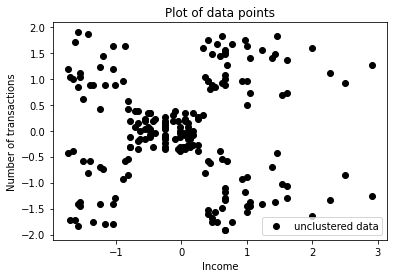

In [102]:
plt.scatter(dbscan_X[:,0],dbscan_X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

### Let's choose epsilon = 0.5 and minPoints = 10

In [113]:
eps_value = 0.5
min_points = 10
my_labels = dbscan(dbscan_X, eps=eps_value, MinPts=min_points)

print(my_labels)

[-1, 1, 2, 1, -1, 1, 2, -1, 2, 1, 2, -1, 2, 1, 2, 1, -1, 1, -1, -1, -1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, -1, 3, 4, 3, -1, 3, 4, -1, 4, -1, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [118]:
len(my_labels)

200

In [120]:

for row in df.itertuples():
  if(my_labels[row.Index]>0):
    df.at[row.Index, 'Dbscan_predicted'] = labels[my_labels[row.Index-1]]


### Calculate accuracy for DBSCAN

In [121]:
df.Class.value_counts()

C    75
A    37
D    32
E    30
B    26
Name: Class, dtype: int64

In [122]:
df.Dbscan_predicted.value_counts()

B    106
E     33
D     30
C     10
Name: Dbscan_predicted, dtype: int64

In [123]:
actual_results = df['Class'].tolist()
predicted_dbscan_results = df['Dbscan_predicted'].tolist()

In [124]:
from sklearn.metrics import accuracy_score

print(f"Accuracy of kmeans classifier is: {accuracy_score(actual_results, predicted_dbscan_results)}")

Accuracy of kmeans classifier is: 0.115
